## Implementation of Gradient Descent - MLR

In [72]:
import pandas as pd
import numpy as np

### Read the dataset

In [73]:
sales_df = pd.read_csv( 'Advertising.csv' )

In [74]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [75]:
sales_df.head( 10 )

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### Set the X and Y Variables

In [76]:
X = sales_df[['TV', 'Radio', 'Newspaper']]

In [77]:
Y = sales_df['Sales']

In [78]:
X[0:5]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [79]:
Y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Standardize X & Y

In [80]:
X.std().reset_index()

,index,0
0,TV,85.854236
1,Radio,14.846809
2,Newspaper,21.778621


In [81]:
y_std = Y.std()

In [82]:
Y = np.array( (Y - Y.mean() ) / Y.std() )

In [83]:
X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(), axis = 0 )

In [84]:
X[0:5]

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


In [85]:
X = np.array( X )

In [86]:
X[0:5]

array([[ 0.9674246 ,  0.97906559,  1.77449253],
       [-1.19437904,  1.0800974 ,  0.66790272],
       [-1.51235985,  1.52463736,  1.77908419],
       [ 0.05191939,  1.21480648,  1.28318502],
       [ 0.39319551, -0.83950698,  1.27859336]])

### Random Initialization of Beta parameters

In [87]:
import random

In [88]:
def initialize( dim ):
    b = random.random()
    w = np.random.rand( dim ) 
    
    return b, w

In [89]:
b, w = initialize( 3 )
print( b, w )

0.9603491808492292 [0.32654392 0.62927967 0.12765379]


In [90]:
w.shape

(3,)

In [91]:
X.shape

(200, 3)

### Predict Y values with beta parameters passed

In [92]:
X.shape

(200, 3)

In [93]:
w.shape

(3,)

In [94]:
def predict_Y( b, w, X ):
    return b + np.matmul( X, w )

In [95]:
Y_hat = predict_Y( b, w, X)
Y_hat[0:10]

array([ 2.11888256,  1.33527562,  1.6530274 ,  1.90555959,  0.7236774 ,
        1.78126258,  0.98261242,  0.59185902, -0.63647397,  0.23034252])

In [96]:
Y[0:10]

array([ 1.54816813, -0.69430382, -0.90513451,  0.85817677, -0.21514314,
       -1.30762948, -0.42597384, -0.15764386, -1.76762372, -0.65597096])

### Calculate RMSE

In [97]:
import math

In [98]:
def get_cost( Y, Y_hat ):
    Y_resid = Y - Y_hat
    return np.sum( np.matmul( Y_resid.T, Y_resid ) ) / ( len( Y_resid ))

In [99]:
Y.shape

(200,)

In [100]:
Y_hat.shape

(200,)

In [101]:
get_cost( Y, Y_hat )

1.2294262776745175

### Update beta parameters 

In [102]:
(Y_hat - Y).shape

(200,)

In [103]:
learning_rate = 0.1

In [104]:
X.shape

(200, 3)

In [105]:
(Y_hat - Y).shape

(200,)

In [106]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ):
    db = (2 * np.sum( y_hat - y )) / len(y)
    dw = (2 * np.dot( ( y_hat - y ), x ) ) / len(y)
    b_0 = b_0 - learning_rate * db
    w_0 = w_0 - learning_rate * dw
    
    return b_0, w_0

In [107]:
b, w = update_beta( X, Y, Y_hat, b, w, 0.1 )

In [108]:
b

0.7682793446793834

In [109]:
w

array([0.4089218 , 0.60616438, 0.09965786])

### Gradient Descent Algorithm

In [110]:
num_iterations = 10000
all_costs = []
alpha = 0.001
epsilon = 0.00001

b, w = initialize( X.shape[1] )

print( "Initial guess of b and w: ", b, w )    

iter_num = 0


for each_iter in range(num_iterations):
    Y_hat = predict_Y( b, w, X )
    this_cost = get_cost( Y, Y_hat )
    prev_b = b
    prev_w = w
    b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)
    
    if( iter_num % 1000 == 0 ):
        print( "iteration:[", iter_num, "]: ", 
              " - [Cost: ]", this_cost, 6 )    

#    print( b, w )
#    print( Y_hat[0:10] )
        
        
    all_costs.append( this_cost )
    iter_num += 1

#    if( ( abs(beta_0 - old_beta_0) < epsilon ) and ( abs( beta_1 - old_beta_1 ) < epsilon) ):
#        break
    
print( "\n\nFinal estimates of b and w: ", b, w )    

Initial guess of b and w:  0.39968550743143627 [0.23018902 0.10787647 0.94031871]
iteration:[ 0 ]:   - [Cost: ] 1.2881974807889531 6
iteration:[ 1000 ]:   - [Cost: ] 0.15865158411307775 6
iteration:[ 2000 ]:   - [Cost: ] 0.10601074789807571 6
iteration:[ 3000 ]:   - [Cost: ] 0.10254999550639451 6
iteration:[ 4000 ]:   - [Cost: ] 0.10229617683539668 6
iteration:[ 5000 ]:   - [Cost: ] 0.10227699639799916 6
iteration:[ 6000 ]:   - [Cost: ] 0.10227553568856344 6
iteration:[ 7000 ]:   - [Cost: ] 0.10227542422525576 6
iteration:[ 8000 ]:   - [Cost: ] 0.10227541571543843 6
iteration:[ 9000 ]:   - [Cost: ] 0.1022754150656608 6


Final estimates of b and w:  8.074793378582207e-10 [ 0.7530659   0.53647976 -0.0043289 ]


### Plot the cost function for each iteration

In [111]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

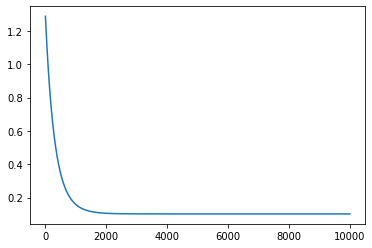

In [112]:
plt.plot( range(iter_num), all_costs );

### Estimate the paramters using sklearn

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lreg = LinearRegression()
lreg.fit( X, Y )

LinearRegression()

In [115]:
lreg.intercept_

2.6626885691654634e-16

In [116]:
lreg.coef_

array([ 0.75306591,  0.53648155, -0.00433069])

### Estimating the parameters using SGD

In [126]:
from sklearn.linear_model import SGDRegressor

In [133]:
SGDRegressor?

In [158]:
sgd = SGDRegressor(max_iter=100, 
                   eta0=0.1)
sgd.fit( X, Y )

SGDRegressor(eta0=0.1, max_iter=100)

In [159]:
sgd.intercept_

array([0.02390084])

In [160]:
sgd.coef_

array([ 0.75428521,  0.53519923, -0.03114694])

### Ordinary Least Square - Closed Form Solution

In [121]:
from numpy.linalg import inv

In [122]:
np.matmul( np.matmul( inv( np.matmul( X.T, X ) ), X.T ), Y)

array([ 0.75306591,  0.53648155, -0.00433069])